In [1]:
import textblob as tb
import numpy as np
import pandas as pd
import nltk

In [2]:
from twitter_helper import TweetTimeLineHelper, cleanTweet, analyze

### Fetch tweets from Twitter
only for update

In [3]:
timeLineHelper = TweetTimeLineHelper(items=300)
timeLineHelper.saveToCsv()

In [4]:
tweets = pd.read_csv('tweets.csv')

In [5]:
tweets['text_cleaned'] = tweets['text'].apply(cleanTweet)
tweets

,Unnamed: 0,created_at,text,retweet_count,favorite_count,retweeted,text_cleaned
0,0,2020-06-14 06:30:38,RT @SpaceX: Falcon 9 launches 58 Starlink sate...,8054,0,False,RT Falcon 9 launches 58 Starlink satellites an...
1,1,2020-06-14 06:09:21,@JimBridenstine @NASA Congratulations Kathy!,137,5634,False,Congratulations Kathy
2,2,2020-06-11 16:02:48,@mcot2222 @olenamuliarchuk @mrkylefield @clean...,44,1209,False,Acceptable if your drivetrain is very efficien...
3,3,2020-06-11 10:05:43,@justpaulinelol @engineers_feed As foretold by...,323,11466,False,feed As foretold by
4,4,2020-06-11 10:01:41,@engineers_feed Stonks,5027,57744,False,feed Stonks
...,...,...,...,...,...,...,...
295,295,2020-05-12 10:46:27,@PPathole 🤣🤣,73,8026,False,
296,296,2020-05-12 10:37:47,@KenJennings All other car companies are allow...,633,7844,False,All other car companies are allowed to manufac...
297,297,2020-05-12 08:44:45,@teslaownersSV Much appreciated!,48,2454,False,Much appreciated
298,298,2020-05-12 08:31:00,That’s pretty much what happened https://t.co/...,40296,420599,False,That s pretty much what happened


In [8]:
import pickle

with open('classifier_trained.pkl', 'rb') as fid:
    cl = pickle.load(fid)
  

In [11]:
cl.analyze('This sucks')

AttributeError: 'NaiveBayesClassifier' object has no attribute 'analyze'

In [10]:
tweets['sentiment'] = tweets['text_cleaned'].map(lambda text: analyze(text, analyzer=cl))
tweets

ValueError: analyzer must be an instance of BaseSentimentAnalyzer

In [7]:
tweets['sentiment_percentage'] = tweets['sentiment'].apply(lambda x: x[1])
tweets['sentiment_classfication'] = tweets['sentiment'].apply(lambda x: x[0])
tweets = pd.get_dummies(tweets, columns=['sentiment_classfication'])
tweets


,Unnamed: 0,created_at,text,retweet_count,favorite_count,retweeted,text_cleaned,sentiment,sentiment_percentage,sentiment_classfication_neg,sentiment_classfication_pos
0,0,2020-05-30 17:13:59,RT @SpaceX: Live webcast of Crew Dragon’s test...,6100,0,False,RT Live webcast of Crew Dragon s test flight w...,"[pos, 0.6425980888371833]",0.642598,0,1
1,1,2020-05-30 16:24:20,RT @SpaceX: .@AstroBehnken and @Astro_Doug arr...,3356,0,False,RT and Doug arrive at historic Launch Complex 39A,"[pos, 0.9207448116128729]",0.920745,0,1
2,2,2020-05-30 12:17:14,RT @SpaceX: All systems go for Crew Dragon’s t...,8442,0,False,RT All systems go for Crew Dragon s test fligh...,"[pos, 0.9099355886639557]",0.909936,0,1
3,3,2020-05-30 11:38:33,@engineers_feed Falcon/Dragon are designed to ...,1785,42990,False,feed Falcon Dragon are designed to withstand m...,"[pos, 0.9932103371380518]",0.993210,0,1
4,4,2020-05-30 11:34:59,@Commercial_Crew @NASA @SpaceX Proceeding with...,2461,22322,False,Crew Proceeding with countdown today weather c...,"[neg, 0.5483318564232562]",0.548332,1,0
...,...,...,...,...,...,...,...,...,...,...,...
295,295,2020-05-06 06:55:04,@Grimezsz Archangel-12 https://t.co/s9g69SU1Ju,982,18874,False,Archangel 12,"[pos, 0.5]",0.500000,0,1
296,296,2020-05-06 06:48:44,"@Grimezsz SR-71, but yes",1903,50227,False,SR 71 but yes,"[neg, 0.5653744125377392]",0.565374,1,0
297,297,2020-05-06 06:31:42,@truth_tesla @flabellina212 @bouncygulag @tmor...,91,1833,False,tesla Not to mention,"[neg, 0.5264822711923106]",0.526482,1,0
298,298,2020-05-06 04:50:19,@BocachicaMaria1 Thanks Maria 💕,41,2053,False,Thanks Maria,"[neg, 0.5194552529182879]",0.519455,1,0


In [8]:
tweets['created_at'] = pd.to_datetime(tweets['created_at'])

In [9]:
tweets[tweets['created_at'] == '2020-05-16']

,Unnamed: 0,created_at,text,retweet_count,favorite_count,retweeted,text_cleaned,sentiment,sentiment_percentage,sentiment_classfication_neg,sentiment_classfication_pos


In [10]:
tweets.dropna()

,Unnamed: 0,created_at,text,retweet_count,favorite_count,retweeted,text_cleaned,sentiment,sentiment_percentage,sentiment_classfication_neg,sentiment_classfication_pos
0,0,2020-05-30 17:13:59,RT @SpaceX: Live webcast of Crew Dragon’s test...,6100,0,False,RT Live webcast of Crew Dragon s test flight w...,"[pos, 0.6425980888371833]",0.642598,0,1
1,1,2020-05-30 16:24:20,RT @SpaceX: .@AstroBehnken and @Astro_Doug arr...,3356,0,False,RT and Doug arrive at historic Launch Complex 39A,"[pos, 0.9207448116128729]",0.920745,0,1
2,2,2020-05-30 12:17:14,RT @SpaceX: All systems go for Crew Dragon’s t...,8442,0,False,RT All systems go for Crew Dragon s test fligh...,"[pos, 0.9099355886639557]",0.909936,0,1
3,3,2020-05-30 11:38:33,@engineers_feed Falcon/Dragon are designed to ...,1785,42990,False,feed Falcon Dragon are designed to withstand m...,"[pos, 0.9932103371380518]",0.993210,0,1
4,4,2020-05-30 11:34:59,@Commercial_Crew @NASA @SpaceX Proceeding with...,2461,22322,False,Crew Proceeding with countdown today weather c...,"[neg, 0.5483318564232562]",0.548332,1,0
...,...,...,...,...,...,...,...,...,...,...,...
295,295,2020-05-06 06:55:04,@Grimezsz Archangel-12 https://t.co/s9g69SU1Ju,982,18874,False,Archangel 12,"[pos, 0.5]",0.500000,0,1
296,296,2020-05-06 06:48:44,"@Grimezsz SR-71, but yes",1903,50227,False,SR 71 but yes,"[neg, 0.5653744125377392]",0.565374,1,0
297,297,2020-05-06 06:31:42,@truth_tesla @flabellina212 @bouncygulag @tmor...,91,1833,False,tesla Not to mention,"[neg, 0.5264822711923106]",0.526482,1,0
298,298,2020-05-06 04:50:19,@BocachicaMaria1 Thanks Maria 💕,41,2053,False,Thanks Maria,"[neg, 0.5194552529182879]",0.519455,1,0


In [11]:
import math
from functools import reduce

tweets_groupper= tweets.groupby(pd.Grouper(key='created_at', freq='1D'))

tweets_gropuped = pd.DataFrame()
tweets_gropuped['sentiment_count_neg'] = tweets_groupper['sentiment_classfication_neg'].apply(lambda val: (reduce((lambda x, y: x + y),val.tolist() if len(val.tolist()) else [0])))
tweets_gropuped['sentiment_count_pos'] = tweets_groupper['sentiment_classfication_pos'].apply(lambda val: (reduce((lambda x, y: x + y),val.tolist() if len(val.tolist()) else [0])))
tweets_gropuped['strongest_sentiment_class'] = tweets_groupper['sentiment'].max().map(lambda sentiment: sentiment[0] if isinstance(sentiment, list) and not math.isnan(sentiment[1]) else 'none')
tweets_gropuped['strongest_sentiment_value'] = tweets_groupper['sentiment'].max().map(lambda sentiment: sentiment[1] if isinstance(sentiment, list) and not math.isnan(sentiment[1]) else 0)

tweets_gropuped['ratio_pos/neg'] = (tweets_gropuped['sentiment_count_pos'] - tweets_gropuped['sentiment_count_neg']) / (tweets_gropuped['sentiment_count_pos'] + tweets_gropuped['sentiment_count_neg'] )
tweets_gropuped

,sentiment_count_neg,sentiment_count_pos,strongest_sentiment_class,strongest_sentiment_value,ratio_pos/neg
created_at,,,,,
2020-05-06,8,5,pos,0.683007,-0.230769
2020-05-07,9,21,pos,0.879500,0.400000
2020-05-08,3,13,pos,0.836533,0.625000
2020-05-09,9,9,pos,0.929687,0.000000
2020-05-10,4,10,pos,0.808867,0.428571
2020-05-11,12,12,pos,0.775980,0.000000
2020-05-12,8,10,pos,0.893398,0.111111
2020-05-13,4,15,pos,0.994683,0.578947
2020-05-14,5,4,pos,0.706299,-0.111111


In [12]:
prices = pd.read_csv('TSLA.csv')
prices['Date'] = pd.to_datetime(prices['Date'])
prices.tail()
 



,Date,Open,High,Low,Close,Adj Close,Volume
98,2020-05-20,820.500000,826.000000,811.799988,815.559998,815.559998,7309300
99,2020-05-21,816.000000,832.500000,796.000000,827.599976,827.599976,12254600
100,2020-05-22,822.169983,831.780029,812.000000,816.880005,816.880005,9987500
101,2020-05-26,834.500000,834.599976,815.710022,818.869995,818.869995,8089700
102,2020-05-27,820.859985,827.710022,785.000000,820.229980,820.229980,11529000


In [13]:
tweets_gropuped = tweets_gropuped.reset_index()
tweets_gropuped

,created_at,sentiment_count_neg,sentiment_count_pos,strongest_sentiment_class,strongest_sentiment_value,ratio_pos/neg
0,2020-05-06,8,5,pos,0.683007,-0.230769
1,2020-05-07,9,21,pos,0.879500,0.400000
2,2020-05-08,3,13,pos,0.836533,0.625000
3,2020-05-09,9,9,pos,0.929687,0.000000
4,2020-05-10,4,10,pos,0.808867,0.428571
5,2020-05-11,12,12,pos,0.775980,0.000000
6,2020-05-12,8,10,pos,0.893398,0.111111
7,2020-05-13,4,15,pos,0.994683,0.578947
8,2020-05-14,5,4,pos,0.706299,-0.111111
9,2020-05-15,18,28,pos,0.968014,0.217391


In [14]:
from workalendar.usa import NewYork
import datetime

cal = NewYork()

In [15]:

def stockValue(date, daysDifference, valueTime):
    date = cal.add_working_days(date,daysDifference)
    value = prices[prices['Date'] == date][valueTime].tolist()
    return None if len(value) == 0 else value[0]

tweets_gropuped['next_day_open'] = tweets_gropuped['created_at'].map(lambda date : stockValue(date,1,'Open')) 
tweets_gropuped['previous_day_open'] = tweets_gropuped['created_at'].map(lambda date : stockValue(date,-1,'Open')) 

tweets_gropuped


,created_at,sentiment_count_neg,sentiment_count_pos,strongest_sentiment_class,strongest_sentiment_value,ratio_pos/neg,next_day_open,previous_day_open
0,2020-05-06,8,5,pos,0.683007,-0.230769,777.210022,789.789978
1,2020-05-07,9,21,pos,0.879500,0.400000,793.770020,776.500000
2,2020-05-08,3,13,pos,0.836533,0.625000,790.510010,777.210022
3,2020-05-09,9,9,pos,0.929687,0.000000,790.510010,793.770020
4,2020-05-10,4,10,pos,0.808867,0.428571,790.510010,793.770020
5,2020-05-11,12,12,pos,0.775980,0.000000,827.000000,793.770020
6,2020-05-12,8,10,pos,0.893398,0.111111,820.830017,790.510010
7,2020-05-13,4,15,pos,0.994683,0.578947,780.000000,827.000000
8,2020-05-14,5,4,pos,0.706299,-0.111111,790.349976,820.830017
9,2020-05-15,18,28,pos,0.968014,0.217391,827.780029,780.000000


In [16]:
tweets_gropuped = tweets_gropuped.dropna()

In [17]:
tweets_gropuped['price_change'] = (tweets_gropuped['next_day_open'] - tweets_gropuped['previous_day_open']) / (tweets_gropuped['next_day_open'] + tweets_gropuped['previous_day_open'])
tweets_gropuped

,created_at,sentiment_count_neg,sentiment_count_pos,strongest_sentiment_class,strongest_sentiment_value,ratio_pos/neg,next_day_open,previous_day_open,price_change
0,2020-05-06,8,5,pos,0.683007,-0.230769,777.210022,789.789978,-0.008028
1,2020-05-07,9,21,pos,0.879500,0.400000,793.770020,776.500000,0.010998
2,2020-05-08,3,13,pos,0.836533,0.625000,790.510010,777.210022,0.008484
3,2020-05-09,9,9,pos,0.929687,0.000000,790.510010,793.770020,-0.002058
4,2020-05-10,4,10,pos,0.808867,0.428571,790.510010,793.770020,-0.002058
5,2020-05-11,12,12,pos,0.775980,0.000000,827.000000,793.770020,0.020503
6,2020-05-12,8,10,pos,0.893398,0.111111,820.830017,790.510010,0.018817
7,2020-05-13,4,15,pos,0.994683,0.578947,780.000000,827.000000,-0.029247
8,2020-05-14,5,4,pos,0.706299,-0.111111,790.349976,820.830017,-0.018918
9,2020-05-15,18,28,pos,0.968014,0.217391,827.780029,780.000000,0.029718


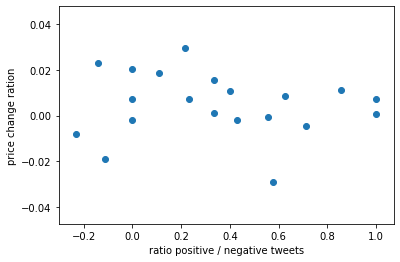

In [18]:
import matplotlib.pyplot as plt

plt.xlabel('ratio positive / negative tweets')
plt.ylabel('price change ration')
plt.scatter(tweets_gropuped['ratio_pos/neg'], tweets_gropuped['price_change'])